In [2]:
import pandas as pd
results = []
for _id in range(5):
    record_path = f'../eval_results/eval_results_gpt_3_5/ajgt_prompt_engineering/ajgt-prompt-{_id}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-3.5', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [3]:
import pandas as pd
for _id in range(5):
    record_path = f'../eval_results/eval_results_gpt_4_0/ajgt_prompt_engineering/ajgt-prompt-{_id}.jsonl'
    with open(record_path, "r") as f:
        events_df = pd.read_json(f, lines=True)
    results.append(['GPT-4.0', _id,  round(events_df[events_df["final_report"].notnull()]["final_report"].to_list()[0]['accuracy'], 4)])

In [4]:
results

[['GPT-3.5', 0, 0.6583],
 ['GPT-3.5', 1, 0.8389],
 ['GPT-3.5', 2, 0.8306],
 ['GPT-3.5', 3, 0.4806],
 ['GPT-3.5', 4, 0.8694],
 ['GPT-4.0', 0, 0.8219],
 ['GPT-4.0', 1, 0.8536],
 ['GPT-4.0', 2, 0.9063],
 ['GPT-4.0', 3, 0.9148],
 ['GPT-4.0', 4, 0.8194]]

In [5]:
import seaborn as sns

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(results)
df.columns = ['Model', 'Prompt', 'Accuracy']

In [8]:
df

,Model,Prompt,Accuracy
0,GPT-3.5,0,0.6583
1,GPT-3.5,1,0.8389
2,GPT-3.5,2,0.8306
3,GPT-3.5,3,0.4806
4,GPT-3.5,4,0.8694
5,GPT-4.0,0,0.8219
6,GPT-4.0,1,0.8536
7,GPT-4.0,2,0.9063
8,GPT-4.0,3,0.9148
9,GPT-4.0,4,0.8194


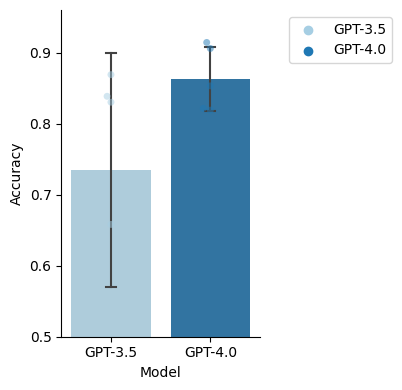

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Paired")
g = sns.catplot(
    x="Model", 
    y="Accuracy", 
    data=df, 
    kind="bar", 
    errorbar = "sd", 
    errwidth=1.5,
    capsize = 0.1,
    height=4, 
    aspect=.7,)
sns.swarmplot(data=df, x="Model", y="Accuracy", hue ='Model', alpha=0.5, legend='auto')
plt.legend(loc='upper right', bbox_to_anchor=(1.7,1))
plt.ylim(0.5)
plt.savefig("../figures/prompt_engineering.pdf")